In [1]:
import pandas as pd

## Page Length Info

In [41]:
filename = "gene_wiki_vol_info.tsv"

In [42]:
gene_wiki_vol_info =  pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [43]:
gene_wiki_vol_info.head()

,title,page_length,last_touched,lastrevid
0,Pulmonary surfactant-associated protein A1,52,2021-09-20T23:54:16Z,798876038
1,SFTPA2,52,2021-09-20T23:54:57Z,798877294
2,MiR-155,86517,2021-11-16T11:12:47Z,1043454804
3,Epoxide hydrolase 2,26435,2021-11-14T22:52:27Z,1041057438
4,LIG3,30861,2021-11-14T22:52:28Z,1042913008


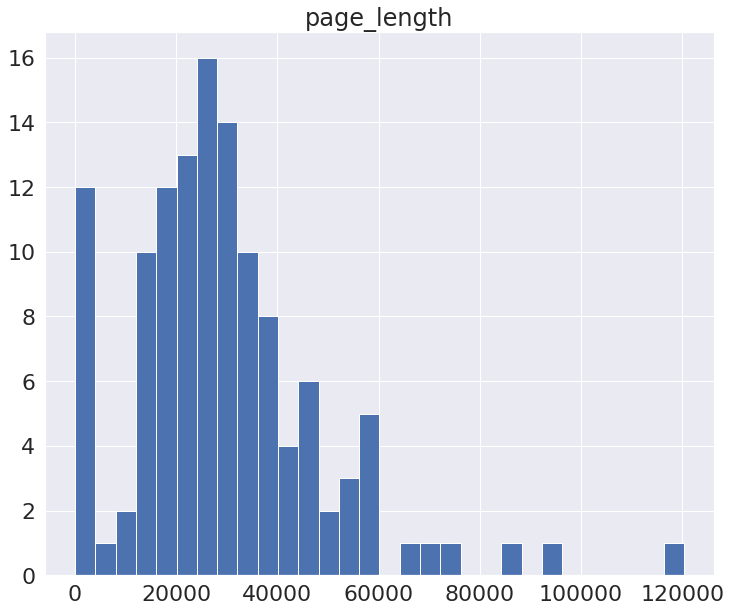

In [47]:
page_length_hist = gene_wiki_vol_info[["page_length"]].hist(bins=30)

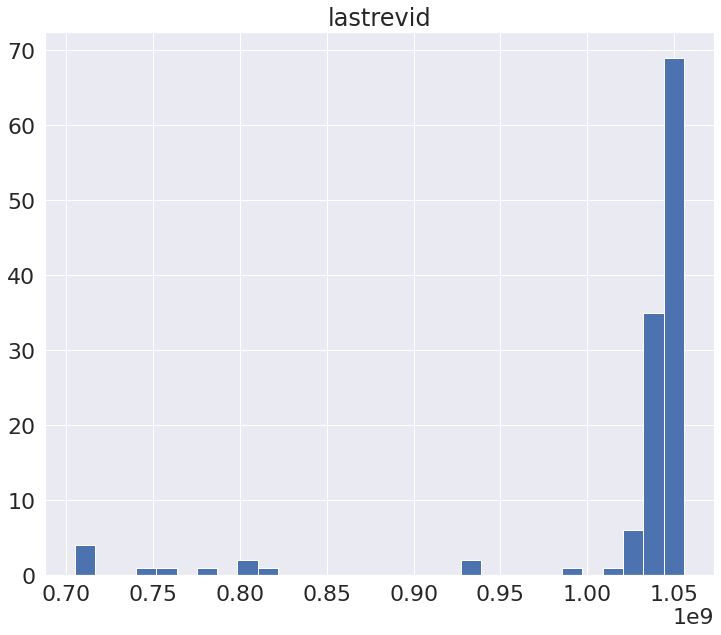

In [48]:
rev_num_hist = gene_wiki_vol_info[["lastrevid"]].hist(bins=30)

## Page Views Info

In [4]:
filename = "gw_pvs.tsv"

In [5]:
gw_pageviews =  pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [6]:
gw_pageviews.head()

,wikipedia,2015070100,2015080100,2015090100,2015100100,2015110100,2015120100,2016010100,2016020100,2016030100,...,2021010100,2021020100,2021030100,2021040100,2021050100,2021060100,2021070100,2021080100,2021090100,2021100100
0,ABCA7,230.0,157.0,213.0,235.0,264.0,152.0,232.0,168.0,214.0,...,165.0,153.0,198.0,152.0,238.0,176.0,195.0,114.0,127.0,110.0
1,AGTPBP1_(gene),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,75.0,35.0,25.0,29.0,34.0,30.0,14.0,19.0,40.0
2,ALOX15,207.0,178.0,261.0,306.0,343.0,366.0,343.0,333.0,436.0,...,516.0,445.0,538.0,471.0,438.0,421.0,298.0,333.0,402.0,380.0
3,APOA5,356.0,304.0,376.0,375.0,386.0,322.0,377.0,374.0,538.0,...,284.0,279.0,300.0,309.0,304.0,251.0,218.0,198.0,192.0,220.0
4,Apolipoprotein_D,353.0,278.0,361.0,339.0,410.0,339.0,316.0,391.0,376.0,...,333.0,306.0,405.0,352.0,356.0,409.0,222.0,228.0,249.0,257.0


In [49]:
gw_pageviews.columns

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [8]:
from datetime import datetime

In [9]:
testdate_str = gw_pageviews.columns[1]

In [10]:
testdate_str

'2015070100'

In [11]:
# format
format = '%Y%m%d00'

In [12]:
# convert from string format to datetime format
testdate = datetime.strptime(testdate_str, format)

In [13]:
# get the date from the datetime using date() 
# function
print(testdate.date())

2015-07-01


In [37]:
date_list = []
format = '%Y%m%d00'

avg_pageviews_all = []
gw_pv_summary = pd.DataFrame(columns=["Date", "Average Pageviews (All Pages)"])

In [38]:
for date in gw_pageviews.columns:
    if (date == 'wikipedia') : continue
    else :
        date_list.append(datetime.strptime(date, format))
        avg_pageviews_all.append(gw_pageviews[[date]].mean(axis=0)[0])
        

In [39]:
gw_pv_summary["Date"] = date_list
gw_pv_summary["Average Pageviews (All Pages)"] = avg_pageviews_all

In [30]:
gw_pageviews[[date]].mean(axis=0)

2021100100    314.861789
dtype: float64

In [25]:
print(date_list[0].date())

2015-07-01


In [38]:
print(avg_pageviews_all)

[465.6521739130435, 458.7739130434783, 575.1913043478261, 652.3478260869565, 634.8559322033898, 556.3559322033898, 600.2033898305085, 610.9745762711865, 690.1355932203389, 718.6440677966102, 705.3305084745763, 557.3135593220339, 475.05882352941177, 486.39495798319325, 542.3025210084033, 633.9333333333333, 704.8151260504202, 642.1428571428571, 644.9327731092437, 606.9831932773109, 709.218487394958, 674.8823529411765, 688.453781512605, 552.0588235294117, 481.97478991596637, 502.1512605042017, 531.6890756302521, 623.9579831932773, 645.7394957983194, 548.8235294117648, 597.8655462184873, 533.8823529411765, 607.3025210084033, 606.0420168067227, 626.4201680672269, 502.85833333333335, 469.2083333333333, 473.675, 515.0, 631.3666666666667, 600.6083333333333, 527.4, 561.775, 539.4416666666667, 613.7, 599.3223140495868, 570.5206611570248, 463.5206611570248, 423.20661157024796, 405.5245901639344, 501.8524590163934, 607.0491803278688, 540.7868852459017, 471.8114754098361, 495.78688524590166, 493.44

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.pyplot import figure

<Figure size 1800x1500 with 0 Axes>

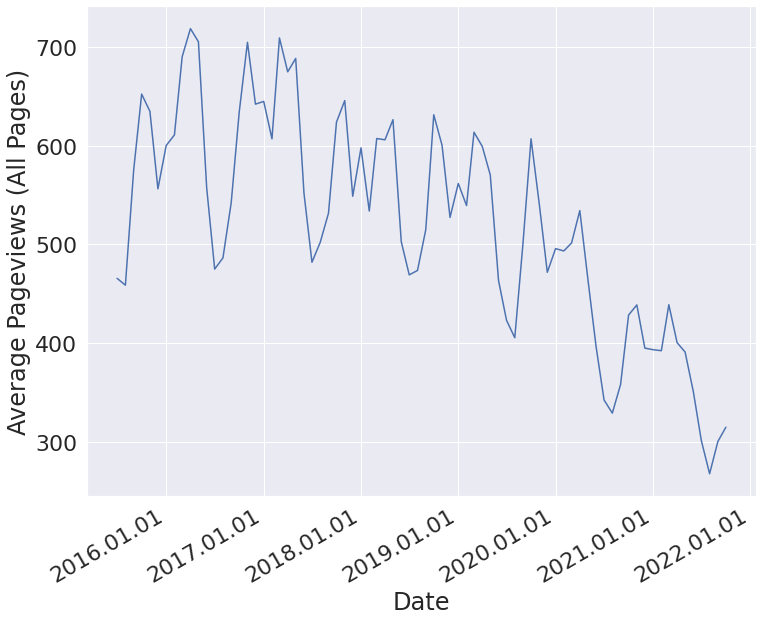

In [40]:
figure(figsize=(12, 10), dpi=150)
plt.rcParams['figure.figsize'] = [12, 10]

sns.set(font_scale = 2)

fig, ax = plt.subplots()
sns.lineplot(data=gw_pv_summary, x='Date', y='Average Pageviews (All Pages)', ax=ax)

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

In [61]:
gw_gene_total_pvs = pd.DataFrame(columns=["Gene Name", "Total Pageviews"])

In [62]:
gw_gene_total_pvs["Gene Name"] = gw_pageviews["wikipedia"]

In [63]:
gw_gene_total_pvs["Total Pageviews"] = gw_pageviews.drop(["wikipedia"], axis=1).sum(axis=1)

In [66]:
gw_gene_total_pvs = gw_gene_total_pvs.sort_values(by="Total Pageviews")

In [67]:
gw_gene_total_pvs.head()

,Gene Name,Total Pageviews
65,Melanocortin_2_receptor_accessory_protein,380.0
37,IFNL4,399.0
15,"Calponin_1,_basic,_smooth_muscle",410.0
122,Zinc_transporter_ZIP12,797.0
109,TNMD,956.0


In [68]:
gw_gene_total_pvs.tail()

,Gene Name,Total Pageviews
18,"Collagen,_type_III,_alpha_1",149791.0
7,Binding_immunoglobulin_protein,156504.0
26,Endothelial_NOS,200146.0
32,HFE_(gene),286599.0
5,Atrial_natriuretic_peptide,1388234.0


In [2]:
filename = "gene_wiki_views.tsv"

In [3]:
gw_pageviews_raw = pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [4]:
gw_pageviews_raw.head()

,title,views,granularity,timestamp,access,agent
0,Pulmonary_surfactant-associated_protein_A1,74,monthly,2015070100,all-access,user
1,Pulmonary_surfactant-associated_protein_A1,90,monthly,2015080100,all-access,user
2,Pulmonary_surfactant-associated_protein_A1,125,monthly,2015090100,all-access,user
3,Pulmonary_surfactant-associated_protein_A1,117,monthly,2015100100,all-access,user
4,Pulmonary_surfactant-associated_protein_A1,145,monthly,2015110100,all-access,user


## WikiData Added Statements

In [5]:
filename = "wd_statements_added.tsv"

In [6]:
wd_statements_info = pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [7]:
wd_statements_info.head()

,subjectQID,predicatePID,objectQID,subject,object
0,Q57055,P769,Q410412,paracetamol,carbamazepin
1,Q57055,P769,Q177094,paracetamol,imatinib
2,Q57055,P769,Q423364,paracetamol,propranolol
3,Q57055,P769,Q410400,paracetamol,phenytoin
4,Q57055,P769,Q422652,paracetamol,rifampicin


In [8]:
wd_statements_info.shape

(469, 5)